<a href="https://colab.research.google.com/github/YannTorres/Trabalho-Redes-Neurais/blob/main/Trabalho_Alberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabalho de Rede Neural

## Alunos: Yann Azevedo Torres, Thaynara Damazio

###**Importações Iniciais**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import tensorflow as pd_tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

sns.set(style="whitegrid")

###Exploração dos Dados


Estatísticas Descritivas:
                 x1            x2            x3             y
count  10000.000000  10000.000000  10000.000000  10000.000000
mean      24.883191     55.317091     25.002520    154.168602
std        5.752603     20.250619     14.338688     33.626263
min       15.000233     20.011042      0.002406     60.442618
25%       19.926577     37.776206     12.687396    131.534952
50%       24.850572     55.412774     25.103405    157.653489
75%       29.800127     72.953545     37.233693    177.642762
max       34.994353     89.994738     49.995049    233.215126


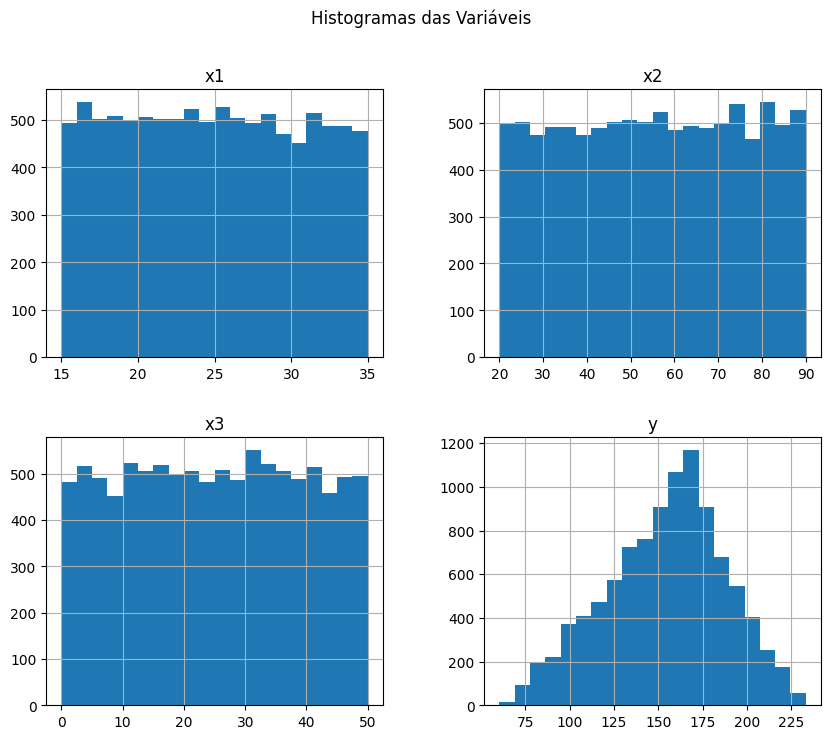

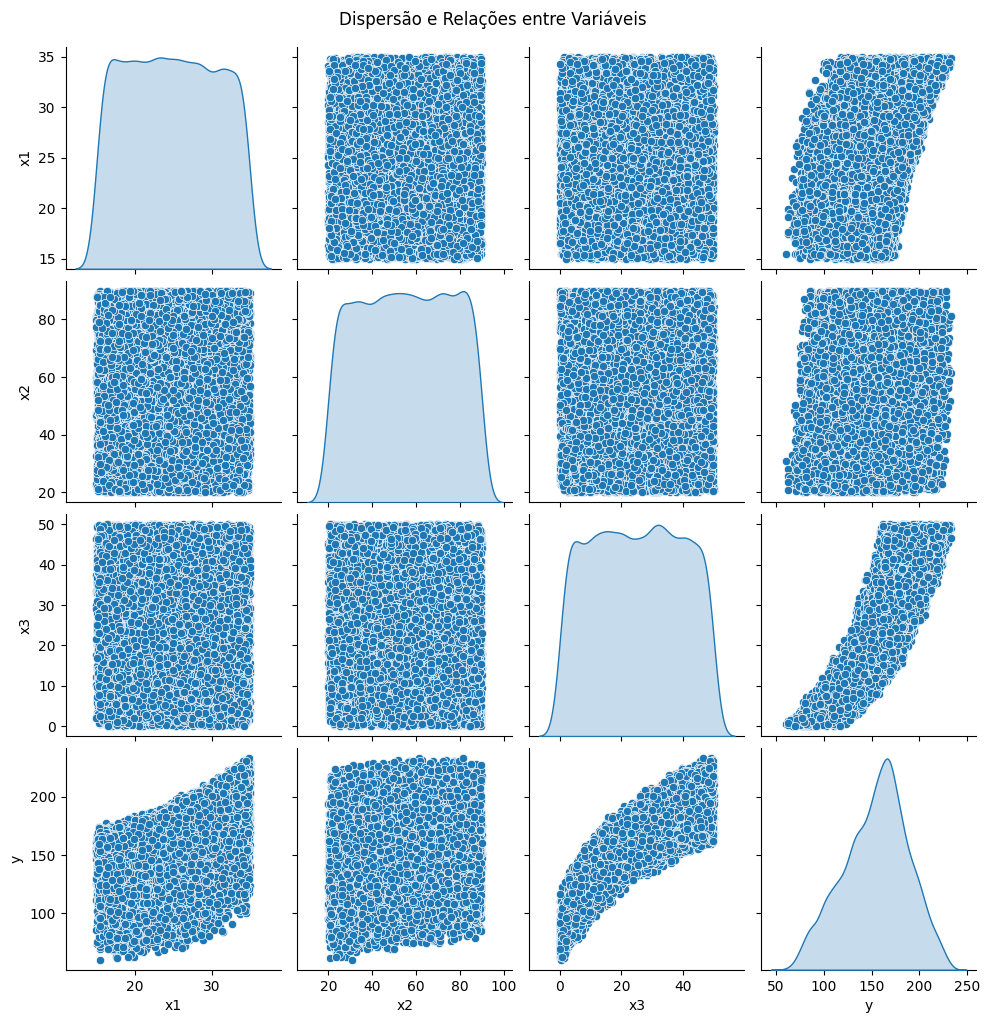

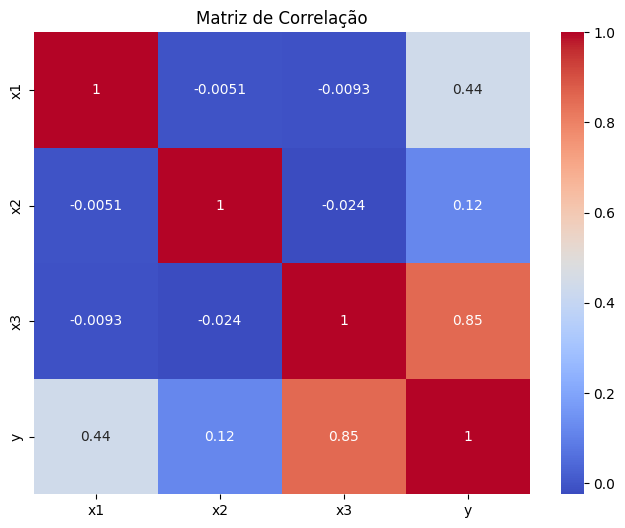

In [ ]:
df = pd.read_csv('consumo_energia_full.csv')

# Estatísticas Descritivas
print("\nEstatísticas Descritivas:")
print(df.describe())

# Histogramas
df.hist(bins=20, figsize=(10, 8))
plt.suptitle("Histogramas das Variáveis")
plt.show()

# Gráfico de Dispersão (Pairplot) para ver correlações
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Dispersão e Relações entre Variáveis", y=1.02)
plt.show()

# Breve análise de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

### PRÉ-PROCESSAMENTO

In [ ]:
X = df[['x1', 'x2', 'x3']]
y = df['y']

# Divisão Treino (80%) e Teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Normalização/Padronização (StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamanho Treino: {X_train_scaled.shape}")
print(f"Tamanho Teste: {X_test_scaled.shape}")

Tamanho Treino: (8000, 3)
Tamanho Teste: (2000, 3)


###Construção da Rede Neural

In [ ]:
model = Sequential()

# Camada Escondida: 10 neurônios, ativação ReLU, entrada de dimensão 3
model.add(Dense(10, activation='relu', input_shape=(3,)))

# Camada de Saída: 1 neurônio (regressão linear simples na saída)
model.add(Dense(1))

# Compilação
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

### Treinamento e Validação

Epoch 1/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22729.8555 - val_loss: 10206.8857
Epoch 2/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6764.2139 - val_loss: 886.3028
Epoch 3/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 622.5457 - val_loss: 287.9273
Epoch 4/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 224.4553 - val_loss: 175.4108
Epoch 5/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 129.6133 - val_loss: 119.2072
Epoch 6/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 98.1099 - val_loss: 93.7937
Epoch 7/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 75.7397 - val_loss: 70.4949
Epoch 8/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52.2197 - val_loss: 38.1763
Epoch 9/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 28.5624 - val_loss: 24.4921
Epoch 10/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 22.6920 - val_loss: 20.7141
Epoch 11/300
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20.2941 - val_loss: 19.7372
Epoc

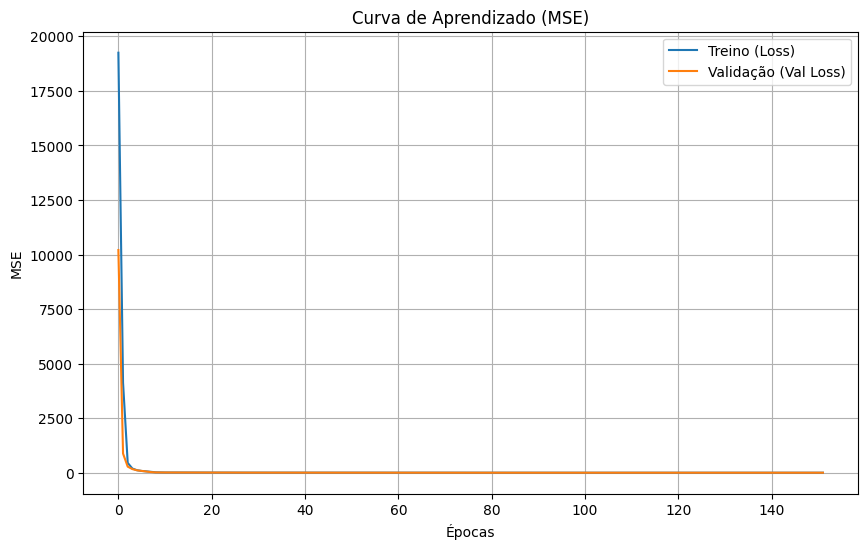

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Treinamento
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=300,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Plotar Curvas de Perda
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Treino (Loss)')
plt.plot(history.history['val_loss'], label='Validação (Val Loss)')
plt.title('Curva de Aprendizado (MSE)')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()

### Avaliação

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Resultados Finais no Teste:
MSE (Erro Quadrático Médio): 9.8366
MAE (Erro Absoluto Médio): 2.4707
R² (Coeficiente de Determinação): 0.9907


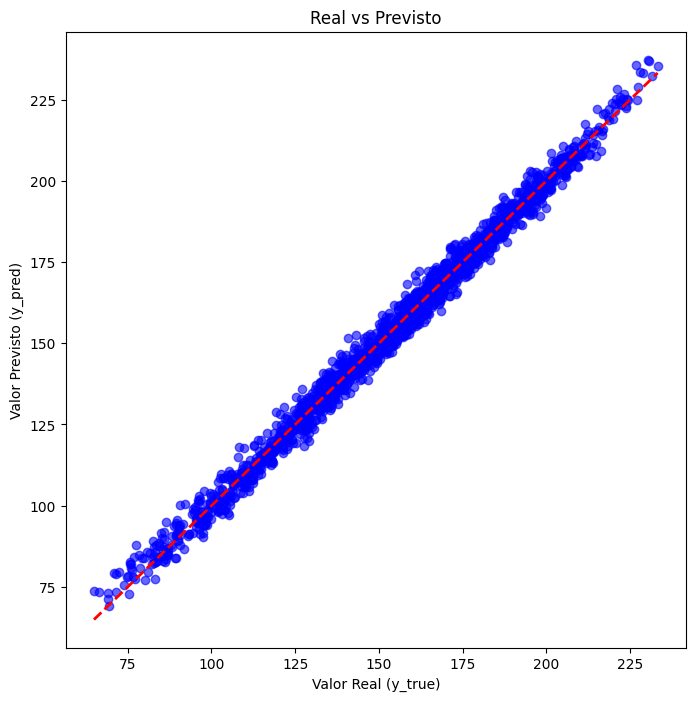

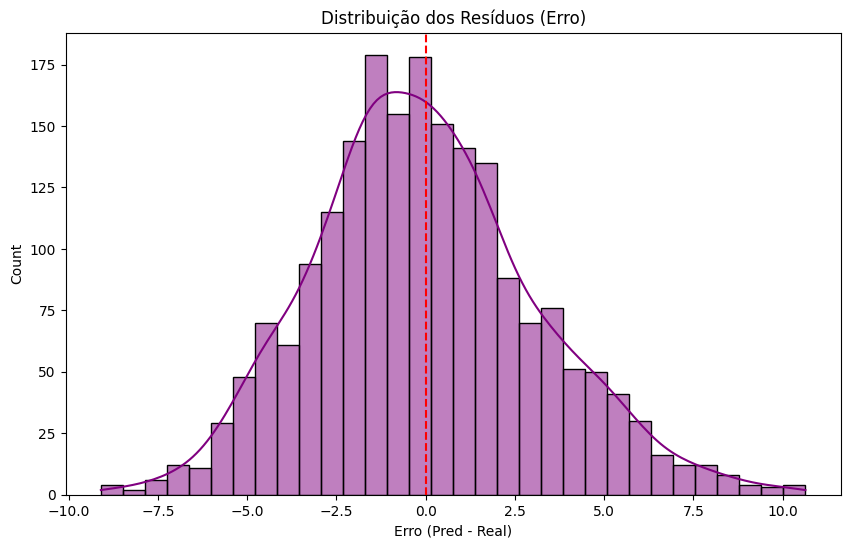

In [ ]:
y_pred = model.predict(X_test_scaled).flatten()

# Calcular Métricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nResultados Finais no Teste:")
print(f"MSE (Erro Quadrático Médio): {mse:.4f}")
print(f"MAE (Erro Absoluto Médio): {mae:.4f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")

# Gráfico Y Real vs Y Previsto
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor Real (y_true)')
plt.ylabel('Valor Previsto (y_pred)')
plt.title('Real vs Previsto')
plt.show()

# Gráfico Distribuição dos Resíduos
residuos = y_pred - y_test
plt.figure(figsize=(10, 6))
sns.histplot(residuos, kde=True, color='purple')
plt.title('Distribuição dos Resíduos (Erro)')
plt.xlabel('Erro (Pred - Real)')
plt.axvline(x=0, color='r', linestyle='--')
plt.show()
